In [3]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv("Data/notes_étudiants.csv", sep=',', index_col='id' )
n = data.shape[0]
p = data.shape[1]


# Application de l'ACP

In [4]:
s_scaler = StandardScaler()
scaled_data = s_scaler.fit_transform(data)


In [5]:
print(np.mean(scaled_data,axis=0))

[ 1.31208176e-16  4.37360585e-17 -1.07657990e-16  9.08364293e-17
 -1.95130107e-16 -1.48029737e-16 -9.42007415e-17  1.61486985e-16
 -1.68215610e-16  8.99953512e-17]


In [6]:
print(np.std(scaled_data,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
pca = PCA()
coords = pca.fit_transform(scaled_data)

In [8]:
print(pca.explained_variance_ratio_)

[0.39895152 0.29268582 0.16848099 0.0951434  0.01518182 0.00992171
 0.00778928 0.00633025 0.0030013  0.00251392]


In [9]:
print(pca.explained_variance_)

[4.11418751 3.01832247 1.73746023 0.98116629 0.15656251 0.10231765
 0.08032697 0.06528068 0.03095086 0.02592482]


In [10]:
eigenvalues = (n-1)/n*pca.explained_variance_
print(eigenvalues)

[3.98951516 2.92685816 1.68480992 0.95143398 0.15181819 0.09921712
 0.07789282 0.06330248 0.03001295 0.02513922]


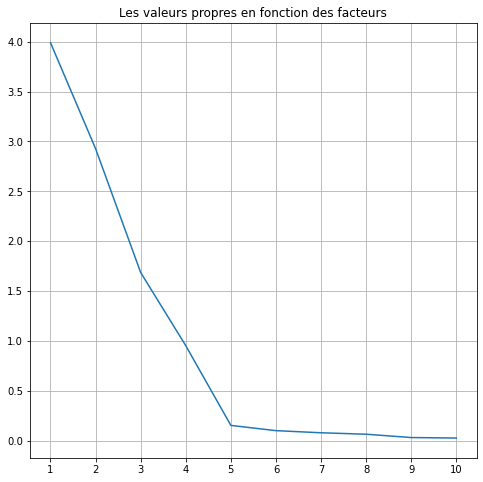

In [11]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xticks(np.arange(11))
axes.plot(range(1,p+1),eigenvalues)
plt.title("Les valeurs propres en fonction des facteurs")
plt.grid()

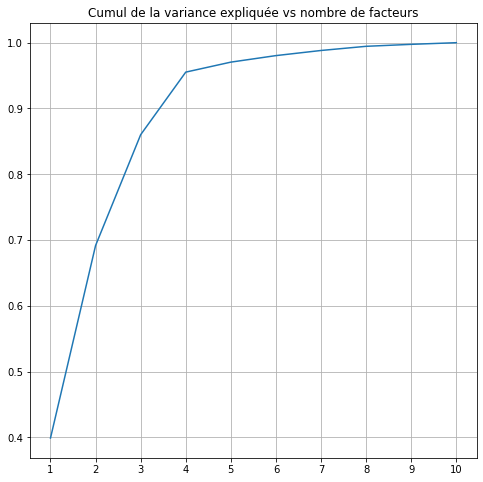

In [12]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xticks(np.arange(11))
axes.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumul de la variance expliquée vs nombre de facteurs") 
plt.grid()

In [13]:
b_i = 1/np.arange(p,0,-1)
print(b_i)

[0.1        0.11111111 0.125      0.14285714 0.16666667 0.2
 0.25       0.33333333 0.5        1.        ]


In [14]:
cumul_b_i = np.cumsum(b_i)
cumul_b_i = cumul_b_i[::-1]
print(pd.DataFrame({'Inertie':eigenvalues,'Seuils':cumul_b_i}))
 

    Inertie    Seuils
0  3.989515  2.928968
1  2.926858  1.928968
2  1.684810  1.428968
3  0.951434  1.095635
4  0.151818  0.845635
5  0.099217  0.645635
6  0.077893  0.478968
7  0.063302  0.336111
8  0.030013  0.211111
9  0.025139  0.100000


In [15]:
np.min(coords[:,1])

-3.235681688284005

In [16]:
np.max(coords[:,1])

5.0540241193016655

# Interprétation des résultats sur les individus

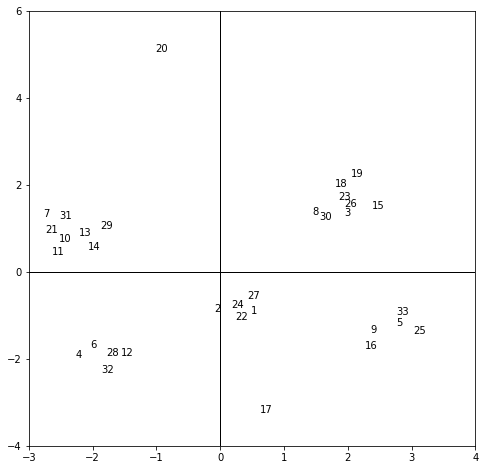

In [17]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-3,4)
axes.set_ylim(-4,6)
plt.plot([-3,4],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,6],color='black',linewidth=1)

for i in range(n):
    plt.annotate(data.index[i],(coords[i,0],coords[i,1]))

In [18]:

total_dist = np.sum(scaled_data**2,axis=1)
dd=coords**2
cos2 = coords**2
for j in range(p):     
    cos2[:,j] = cos2[:,j]/total_dist

print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2]}))

    id    COS2_1    COS2_2    COS2_3
0    1  0.041582  0.162667  0.636153
1    2  0.001479  0.152025  0.610155
2    3  0.296143  0.129340  0.008793
3    4  0.496391  0.377519  0.066270
4    5  0.633967  0.129396  0.043465
5    6  0.506374  0.373161  0.014751
6    7  0.747993  0.159155  0.017600
7    8  0.241794  0.201100  0.250415
8    9  0.617049  0.215174  0.029254
9   10  0.750834  0.058016  0.121856
10  11  0.792855  0.016894  0.102391
11  12  0.237195  0.368166  0.000911
12  13  0.777251  0.107828  0.064473
13  14  0.884899  0.053616  0.028857
14  15  0.673773  0.254342  0.047249
15  16  0.579184  0.353480  0.000244
16  17  0.021925  0.600401  0.345294
17  18  0.348051  0.412005  0.190750
18  19  0.386825  0.442956  0.054132
19  20  0.023314  0.579170  0.385314
20  21  0.557012  0.058751  0.106972
21  22  0.011817  0.274936  0.460710
22  23  0.508693  0.407636  0.048093
23  24  0.003615  0.085346  0.702886
24  25  0.768993  0.172554  0.003076
25  26  0.423769  0.247602  0.142083
2

In [19]:
print(np.sum(cos2,axis=1)) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
ctr = coords**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigenvalues[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]}))

    id     CTR_1     CTR_2     CTR_3
0    1  0.001779  0.009484  0.064431
1    2  0.000063  0.008791  0.061296
2    3  0.028793  0.017141  0.002025
3    4  0.039229  0.040667  0.012401
4    5  0.057563  0.016015  0.009345
5    6  0.031762  0.031905  0.002191
6    7  0.058372  0.016930  0.003252
7    8  0.016004  0.018143  0.039247
8    9  0.042180  0.020049  0.004735
9   10  0.048738  0.005133  0.018730
10  11  0.053050  0.001541  0.016223
11  12  0.018418  0.038967  0.000168
12  13  0.037245  0.007043  0.007316
13  14  0.032942  0.002721  0.002544
14  15  0.042732  0.021988  0.007096
15  16  0.038982  0.032429  0.000039
16  17  0.002904  0.108397  0.108296
17  18  0.024343  0.039279  0.031591
18  19  0.031886  0.049770  0.010566
19  20  0.007810  0.264459  0.305646
20  21  0.057046  0.008202  0.025942
21  22  0.000393  0.012471  0.036303
22  23  0.025808  0.028190  0.005778
23  24  0.000219  0.007044  0.100773
24  25  0.069623  0.021295  0.000660
25  26  0.028749  0.022896  0.022824
2

# Etude des variables

In [21]:
#Les vecteur propres
print(pca.components_)


[[ 0.09594494  0.12702999  0.07908499 -0.39325473 -0.39637592 -0.34502583
   0.43815232  0.37982966  0.42354197 -0.14819484]
 [-0.53424568 -0.5297448  -0.54894635 -0.19731039 -0.16689576 -0.23463371
  -0.02229711 -0.02342448 -0.09565393  0.02399574]
 [ 0.21866772  0.17749139  0.09198628 -0.34989747 -0.35784921 -0.35853232
  -0.34074744 -0.48234094 -0.36557349 -0.22535408]
 [ 0.00889578 -0.09436623 -0.12519225 -0.02753444  0.16680289  0.26162304
  -0.07518451  0.07100781  0.08280198 -0.92777359]
 [-0.1319608  -0.11039597  0.24655905 -0.46219975 -0.35034337  0.67687699
  -0.18557239  0.20841262 -0.13558708  0.13718372]
 [-0.16874964 -0.48624736  0.69569042  0.19724416  0.00096072 -0.32724303
  -0.2438362   0.18287804  0.02197978 -0.10827804]
 [-0.70439969  0.54980187  0.19245597  0.04839     0.04759899 -0.07321167
   0.17333357  0.08351788 -0.31386955 -0.13783547]
 [-0.03766431 -0.12350878  0.19955673 -0.62127163  0.66915541 -0.05700354
   0.21105697 -0.23523671  0.03032088  0.07554192]


In [22]:
sqrt_eigenvalues = np.sqrt(eigenvalues)
corvar = np.zeros((p,p))
for i in range(p):
    corvar[:,i] = pca.components_[i,:] * sqrt_eigenvalues[i]

In [23]:
#LEs variables en ligne et les facteurs en colonne
corvar

array([[ 1.91638216e-01, -9.13990875e-01,  2.83831201e-01,
         8.67707283e-03, -5.14170130e-02, -5.31540254e-02,
        -1.96592911e-01, -9.47633510e-03, -3.39060248e-02,
         4.36208723e-02],
       [ 2.53726791e-01, -9.06290738e-01,  2.30384235e-01,
        -9.20462180e-02, -4.30145248e-02, -1.53161835e-01,
         1.53445769e-01, -3.10747890e-02,  5.32393658e-02,
         7.47917715e-03],
       [ 1.57962536e-01, -9.39140866e-01,  1.19398398e-01,
        -1.22114368e-01,  9.60689103e-02,  2.19133779e-01,
         5.37130849e-02,  5.02084420e-02, -2.03572072e-02,
        -2.87250124e-02],
       [-7.85477989e-01, -3.37559863e-01, -4.54167711e-01,
        -2.68574965e-02, -1.80090837e-01,  6.21294427e-02,
         1.35053018e-02, -1.56311843e-01, -2.65066915e-02,
        -2.18372557e-02],
       [-7.91712174e-01, -2.85526320e-01, -4.64489087e-01,
         1.62702003e-01, -1.36507280e-01,  3.02614253e-04,
         1.32845364e-02,  1.68359395e-01,  2.68839361e-02,
         3.

In [24]:
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2]}))

                    id     COR_1     COR_2     COR_3
0        Mathématiques  0.191638 -0.913991  0.283831
1             Physique  0.253727 -0.906291  0.230384
2  Sciences_Naturelles  0.157963 -0.939141  0.119398
3             Histoire -0.785478 -0.337560 -0.454168
4           Géographie -0.791712 -0.285526 -0.464489
5          Philosophie -0.689147 -0.401413 -0.465376
6             Français  0.875155 -0.038146 -0.442291
7              Anglais  0.758663 -0.040075 -0.626080
8             Allemand  0.845973 -0.163645 -0.474515
9                Sport -0.296001  0.041052 -0.292510


In [25]:
 print(corvar[9,:])

[-0.29600097  0.04105206 -0.29251011 -0.90496406  0.05345206 -0.03410623
 -0.03846889  0.01900634  0.01691409  0.00533787]


Text(0.5, 1.0, 'Cercle des corrélations')

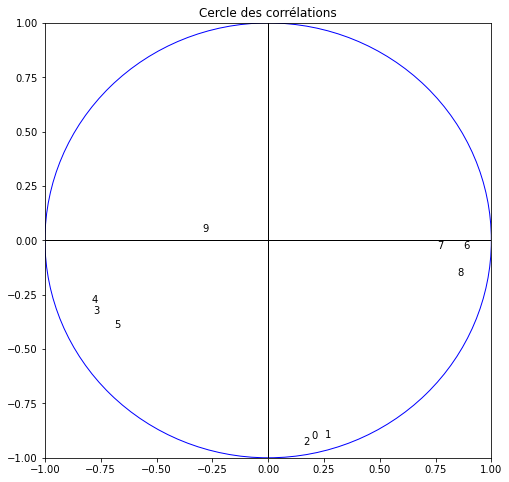

In [26]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(data.columns.get_loc(data.columns[j]),(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(circle)
plt.title("Cercle des corrélations") 

In [27]:
cos2_var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2_var[:,0],'COS2_2':cos2_var[:,1], 'COS2_3':cos2_var[:,2], 'COS2_4':cos2_var[:,3]}))

                    id    COS2_1    COS2_2    COS2_3    COS2_4
0        Mathématiques  0.036725  0.835379  0.080560  0.000075
1             Physique  0.064377  0.821363  0.053077  0.008473
2  Sciences_Naturelles  0.024952  0.881986  0.014256  0.014912
3             Histoire  0.616976  0.113947  0.206268  0.000721
4           Géographie  0.626808  0.081525  0.215750  0.026472
5          Philosophie  0.474923  0.161132  0.216575  0.065122
6             Français  0.765897  0.001455  0.195621  0.005378
7              Anglais  0.575570  0.001606  0.391976  0.004797
8             Allemand  0.715670  0.026780  0.225165  0.006523
9                Sport  0.087617  0.001685  0.085562  0.818960


In [28]:
ctrvar = cos2_var
for i in range(p):
    ctrvar[:,i] = ctrvar[:,i]/eigenvalues[i]
print(pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2], 'CTR_4':ctrvar[:,3]}))

                    id     CTR_1     CTR_2     CTR_3     CTR_4
0        Mathématiques  0.009205  0.285418  0.047816  0.000079
1             Physique  0.016137  0.280630  0.031503  0.008905
2  Sciences_Naturelles  0.006254  0.301342  0.008461  0.015673
3             Histoire  0.154649  0.038931  0.122428  0.000758
4           Géographie  0.157114  0.027854  0.128056  0.027823
5          Philosophie  0.119043  0.055053  0.128545  0.068447
6             Français  0.191977  0.000497  0.116109  0.005653
7              Anglais  0.144271  0.000549  0.232653  0.005042
8             Allemand  0.179388  0.009150  0.133644  0.006856
9                Sport  0.021962  0.000576  0.050784  0.860764


# Représentation des nouveaux individus

In [29]:
new_data = pd.read_csv("Data/notes_nouveaux_étudiants.csv", sep=',', index_col='id' )
Z_new_data = s_scaler.transform(new_data)
coords_new_data = pca.transform(Z_new_data) 

In [30]:
new_data

,Mathématique,Physique,Science.naturelle,Histoire,Géographie,Philosophie,Français,Anglais,Allemand,Sport
id,,,,,,,,,,
34,19.5,20,20,20,20,19.5,19.5,19.5,19.5,10.0
35,13.0,9,13,16,17,17.0,9.0,11.0,13.0,7.5
36,8.0,10,8,8,9,10.0,18.0,19.0,20.0,7.0


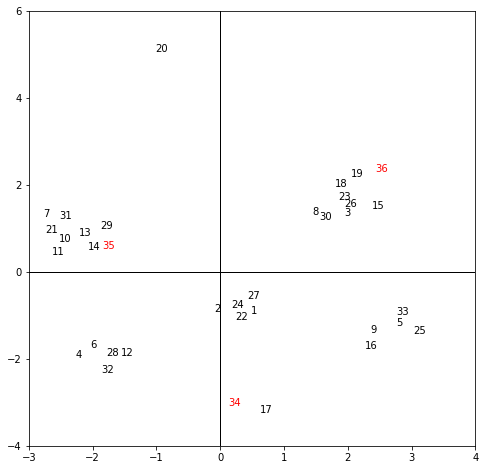

In [31]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-3,4)
axes.set_ylim(-4,6)

for i in range(n):
    plt.annotate(data.index[i],(coords[i,0],coords[i,1])) 
    
for i in range(coords_new_data.shape[0]):
    plt.annotate(new_data.index[i],(coords_new_data[i,0],coords_new_data[i,1]),color='r')    


plt.plot([-3,4],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,6],color='black',linewidth=1)
